# Table of Contents

* [Import packages](#Packages)
* [Import Brain Matrix and Find Number of Pixels in Each Brain](#Pixels_in_brain)
* [Import Sums of Pixels](#Union)
* [Final Thresholding Using Union of All Sample Thresholds](#Thresholding_union)

<a class="anchor" id="Packages"></a>

In [1]:
import scipy
# numpy
import numpy
# matplotlib
import matplotlib
# pandas
import pandas
# scikit-learn
import sklearn
from sklearn import metrics

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
import pandas as pd
import seaborn as sns
import numpy as np
# Load libraries
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from numpy import loadtxt
#from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from itertools import cycle
from sklearn.impute import SimpleImputer
from numpy import mean
from numpy import std
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import statsmodels.api as sm
import random
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import bartlett
from scipy.stats import ttest_ind
import matplotlib.colors as mcolors


# clustering packages 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import normalize
from kneed import KneeLocator
from sklearn.cluster import KMeans

# Packages for importing data
import glob
import time

# Packages needed for defining which file should be added to which dictionary using regex
import re

# Package needed for labeling points in graph
from adjustText import adjust_text

# Packages for image segmentation 
#%matplotlib ipympl
import ipywidgets as widgets
import urllib
import matplotlib.cbook as cbook
from mpl_interactions import image_segmenter
import PIL

# Package for FDR correction 
import statsmodels
import scipy.stats as stats# Table of Contents

# Package for fitting normal distribution
from scipy.stats import norm

# Packages for creating instance of merging dictionaries 
import functools
from functools import partial
from functools import reduce

# For seaborn heatmap
import seaborn
import matplotlib.colors as mcolors

<a class="anchor" id="Pixels_in_brain"></a>
Below we find the number of pixels in each brain so we can normalize each sum by the brain size.

In [2]:
number_pixels_list_left_globus_pallidus = []

for file in glob.glob('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/*pixel_matrix_with_mask_left_globus_pallidus.csv'):
    print(file)
    brain_matrix_without_background = pd.read_csv(file, index_col = 0)
    number_pixels_list_left_globus_pallidus.append(len(brain_matrix_without_background[brain_matrix_without_background.sum(axis = 1) != 0]))
    
number_pixels_list_right_globus_pallidus = []

for file in glob.glob('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/*pixel_matrix_with_mask_right_globus_pallidus.csv'):
    print(file)
    brain_matrix_without_background = pd.read_csv(file, index_col = 0)
    number_pixels_list_right_globus_pallidus.append(len(brain_matrix_without_background[brain_matrix_without_background.sum(axis = 1) != 0]))

D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus\191_a3wt_pixel_matrix_with_mask_left_globus_pallidus.csv
D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus\208_5wt_pixel_matrix_with_mask_left_globus_pallidus.csv
D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus\209_2wt_pixel_matrix_with_mask_left_globus_pallidus.csv
D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus\210_a1tg_pixel_matrix_with_mask_left_globus_pallidus.csv
D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus\225_3tg_pixel_matrix_with_mask_left_globus_pallidus.csv
D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus\225_4wt_pixel_matrix_with_mask_left_globus_pallidus.csv
D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus\225_a1wt_pixel_matrix_with_mask_left_globus_pallidus.csv
D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus\225_a2tg_pixel_matrix_with_mask_left_globus_pallidus.csv
D:/NEW All AGE Negative masks and ro

<a class="anchor" id="Union"></a>
Below we read in all the total sums we saved from the brain segmentations. We also divide each sum by the number of pixels corresponding to that sum.

In [3]:
sums_of_ion_intensities_roi_191_a3wt_left_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/191_a3wt_sum_of_ions_within_left_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_191_a3wt_left_globus_pallidus_df = sums_of_ion_intensities_roi_191_a3wt_left_globus_pallidus_df/number_pixels_list_left_globus_pallidus[0]
sums_of_ion_intensities_roi_208_5wt_left_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/208_5wt_sum_of_ions_within_left_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_208_5wt_left_globus_pallidus_df = sums_of_ion_intensities_roi_208_5wt_left_globus_pallidus_df/number_pixels_list_left_globus_pallidus[1]
sums_of_ion_intensities_roi_209_2wt_left_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/209_2wt_sum_of_ions_within_left_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_209_2wt_left_globus_pallidus_df = sums_of_ion_intensities_roi_209_2wt_left_globus_pallidus_df/number_pixels_list_left_globus_pallidus[2]
sums_of_ion_intensities_roi_210_a1tg_left_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/210_a1tg_sum_of_ions_within_left_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_210_a1tg_left_globus_pallidus_df = sums_of_ion_intensities_roi_210_a1tg_left_globus_pallidus_df/number_pixels_list_left_globus_pallidus[3]
sums_of_ion_intensities_roi_225_3tg_left_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/225_3tg_sum_of_ions_within_left_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_225_3tg_left_globus_pallidus_df = sums_of_ion_intensities_roi_225_3tg_left_globus_pallidus_df/number_pixels_list_left_globus_pallidus[4]
sums_of_ion_intensities_roi_225_4wt_left_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/225_4wt_sum_of_ions_within_left_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_225_4wt_left_globus_pallidus_df = sums_of_ion_intensities_roi_225_4wt_left_globus_pallidus_df/number_pixels_list_left_globus_pallidus[6]
sums_of_ion_intensities_roi_225_a1wt_left_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/225_a1wt_sum_of_ions_within_left_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_225_a1wt_left_globus_pallidus_df = sums_of_ion_intensities_roi_225_a1wt_left_globus_pallidus_df/number_pixels_list_left_globus_pallidus[6]
sums_of_ion_intensities_roi_225_a2tg_left_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/225_a2tg_sum_of_ions_within_left_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_225_a2tg_left_globus_pallidus_df = sums_of_ion_intensities_roi_225_a2tg_left_globus_pallidus_df/number_pixels_list_left_globus_pallidus[7]
sums_of_ion_intensities_roi_226_a1tg_left_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/226_a1tg_sum_of_ions_within_left_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_226_a1tg_left_globus_pallidus_df = sums_of_ion_intensities_roi_226_a1tg_left_globus_pallidus_df/number_pixels_list_left_globus_pallidus[8]
sums_of_ion_intensities_roi_226_a2_WT_s2_left_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/226_a2_WT_s2_sum_of_ions_within_left_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_226_a2_WT_s2_left_globus_pallidus_df = sums_of_ion_intensities_roi_226_a2_WT_s2_left_globus_pallidus_df/number_pixels_list_left_globus_pallidus[9]
sums_of_ion_intensities_roi_249_4_Tg_s1_left_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/249_4_Tg_s1_sum_of_ions_within_left_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_249_4_Tg_s1_left_globus_pallidus_df = sums_of_ion_intensities_roi_249_4_Tg_s1_left_globus_pallidus_df/number_pixels_list_left_globus_pallidus[10]
sums_of_ion_intensities_roi_252_8_WT_s1_left_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/252_8_WT_s1_sum_of_ions_within_left_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_252_8_WT_s1_left_globus_pallidus_df = sums_of_ion_intensities_roi_252_8_WT_s1_left_globus_pallidus_df/number_pixels_list_left_globus_pallidus[11]
sums_of_ion_intensities_roi_256_a3_Tg_s1_left_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/256_a3_Tg_s1_sum_of_ions_within_left_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_256_a3_Tg_s1_left_globus_pallidus_df = sums_of_ion_intensities_roi_256_a3_Tg_s1_left_globus_pallidus_df/number_pixels_list_left_globus_pallidus[12]
sums_of_ion_intensities_roi_268_3_Tg_s4_left_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/268_3_Tg_s4_sum_of_ions_within_left_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_268_3_Tg_s4_left_globus_pallidus_df = sums_of_ion_intensities_roi_268_3_Tg_s4_left_globus_pallidus_df/number_pixels_list_left_globus_pallidus[13]
sums_of_ion_intensities_roi_268_a3_WT_s2_left_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/268_a3_WT_s2_sum_of_ions_within_left_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_268_a3_WT_s2_left_globus_pallidus_df = sums_of_ion_intensities_roi_268_a3_WT_s2_left_globus_pallidus_df/number_pixels_list_left_globus_pallidus[14]
sums_of_ion_intensities_roi_270_5_Tg_s4_left_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/270_5_Tg_s4_sum_of_ions_within_left_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_270_5_Tg_s4_left_globus_pallidus_df = sums_of_ion_intensities_roi_270_5_Tg_s4_left_globus_pallidus_df/number_pixels_list_left_globus_pallidus[15]
sums_of_ion_intensities_roi_270_a1_Tg_s1_left_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/270_a1_Tg_s1_sum_of_ions_within_left_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_270_a1_Tg_s1_left_globus_pallidus_df = sums_of_ion_intensities_roi_270_a1_Tg_s1_left_globus_pallidus_df/number_pixels_list_left_globus_pallidus[16]
sums_of_ion_intensities_roi_278_a2_WT_s1_left_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Left Globus Pallidus/278_a2_WT_s1_sum_of_ions_within_left_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_278_a2_WT_s1_left_globus_pallidus_df = sums_of_ion_intensities_roi_278_a2_WT_s1_left_globus_pallidus_df/number_pixels_list_left_globus_pallidus[17]

Below we do the same for the right globus_pallidus.

In [4]:
sums_of_ion_intensities_roi_191_a3wt_right_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/191_a3wt_sum_of_ions_within_right_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_191_a3wt_right_globus_pallidus_df = sums_of_ion_intensities_roi_191_a3wt_right_globus_pallidus_df/number_pixels_list_right_globus_pallidus[0]
sums_of_ion_intensities_roi_208_5wt_right_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/208_5wt_sum_of_ions_within_right_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_208_5wt_right_globus_pallidus_df = sums_of_ion_intensities_roi_208_5wt_right_globus_pallidus_df/number_pixels_list_right_globus_pallidus[1]
sums_of_ion_intensities_roi_209_2wt_right_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/209_2wt_sum_of_ions_within_right_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_209_2wt_right_globus_pallidus_df = sums_of_ion_intensities_roi_209_2wt_right_globus_pallidus_df/number_pixels_list_right_globus_pallidus[2]
sums_of_ion_intensities_roi_210_a1tg_right_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/210_a1tg_sum_of_ions_within_right_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_210_a1tg_right_globus_pallidus_df = sums_of_ion_intensities_roi_210_a1tg_right_globus_pallidus_df/number_pixels_list_right_globus_pallidus[3]
sums_of_ion_intensities_roi_225_3tg_right_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/225_3tg_sum_of_ions_within_right_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_225_3tg_right_globus_pallidus_df = sums_of_ion_intensities_roi_225_3tg_right_globus_pallidus_df/number_pixels_list_right_globus_pallidus[4]
sums_of_ion_intensities_roi_225_4wt_right_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/225_4wt_sum_of_ions_within_right_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_225_4wt_right_globus_pallidus_df = sums_of_ion_intensities_roi_225_4wt_right_globus_pallidus_df/number_pixels_list_right_globus_pallidus[5]
sums_of_ion_intensities_roi_225_a1wt_right_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/225_a1wt_sum_of_ions_within_right_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_225_a1wt_right_globus_pallidus_df = sums_of_ion_intensities_roi_225_a1wt_right_globus_pallidus_df/number_pixels_list_right_globus_pallidus[6]
sums_of_ion_intensities_roi_225_a2tg_right_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/225_a2tg_sum_of_ions_within_right_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_225_a2tg_right_globus_pallidus_df = sums_of_ion_intensities_roi_225_a2tg_right_globus_pallidus_df/number_pixels_list_right_globus_pallidus[7]
sums_of_ion_intensities_roi_226_a1tg_right_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/226_a1tg_sum_of_ions_within_right_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_226_a1tg_right_globus_pallidus_df = sums_of_ion_intensities_roi_226_a1tg_right_globus_pallidus_df/number_pixels_list_right_globus_pallidus[8]
sums_of_ion_intensities_roi_226_a2_WT_s2_right_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/226_a2_WT_s2_sum_of_ions_within_right_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_226_a2_WT_s2_right_globus_pallidus_df = sums_of_ion_intensities_roi_226_a2_WT_s2_right_globus_pallidus_df/number_pixels_list_right_globus_pallidus[9]
sums_of_ion_intensities_roi_249_4_Tg_s1_right_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/249_4_Tg_s1_sum_of_ions_within_right_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_249_4_Tg_s1_right_globus_pallidus_df = sums_of_ion_intensities_roi_249_4_Tg_s1_right_globus_pallidus_df/number_pixels_list_right_globus_pallidus[10]
sums_of_ion_intensities_roi_252_8_WT_s1_right_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/252_8_WT_s1_sum_of_ions_within_right_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_252_8_WT_s1_right_globus_pallidus_df = sums_of_ion_intensities_roi_252_8_WT_s1_right_globus_pallidus_df/number_pixels_list_right_globus_pallidus[11]
sums_of_ion_intensities_roi_256_a3_Tg_s1_right_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/256_a3_Tg_s1_sum_of_ions_within_right_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_256_a3_Tg_s1_right_globus_pallidus_df = sums_of_ion_intensities_roi_256_a3_Tg_s1_right_globus_pallidus_df/number_pixels_list_right_globus_pallidus[12]
sums_of_ion_intensities_roi_268_3_Tg_s4_right_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/268_3_Tg_s4_sum_of_ions_within_right_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_268_3_Tg_s4_right_globus_pallidus_df = sums_of_ion_intensities_roi_268_3_Tg_s4_right_globus_pallidus_df/number_pixels_list_right_globus_pallidus[13]
sums_of_ion_intensities_roi_268_a3_WT_s2_right_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/268_a3_WT_s2_sum_of_ions_within_right_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_268_a3_WT_s2_right_globus_pallidus_df = sums_of_ion_intensities_roi_268_a3_WT_s2_right_globus_pallidus_df/number_pixels_list_right_globus_pallidus[14]
sums_of_ion_intensities_roi_270_5_Tg_s4_right_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/270_5_Tg_s4_sum_of_ions_within_right_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_270_5_Tg_s4_right_globus_pallidus_df = sums_of_ion_intensities_roi_270_5_Tg_s4_right_globus_pallidus_df/number_pixels_list_right_globus_pallidus[15]
sums_of_ion_intensities_roi_270_a1_Tg_s1_right_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/270_a1_Tg_s1_sum_of_ions_within_right_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_270_a1_Tg_s1_right_globus_pallidus_df = sums_of_ion_intensities_roi_270_a1_Tg_s1_right_globus_pallidus_df/number_pixels_list_right_globus_pallidus[16]
sums_of_ion_intensities_roi_278_a2_WT_s1_right_globus_pallidus_df = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Right Globus Pallidus/278_a2_WT_s1_sum_of_ions_within_right_globus_pallidus.csv', index_col = 0)
sums_of_ion_intensities_roi_normalized_278_a2_WT_s1_right_globus_pallidus_df = sums_of_ion_intensities_roi_278_a2_WT_s1_right_globus_pallidus_df/number_pixels_list_right_globus_pallidus[17]

Below we average the ion sums for each side of the brain and create the final percentages.

In [5]:
# Average left and right sides
average_sum_191_a3wt_globus_pallidus = (sums_of_ion_intensities_roi_normalized_191_a3wt_left_globus_pallidus_df + sums_of_ion_intensities_roi_normalized_191_a3wt_right_globus_pallidus_df)/2
# Take sum of all values to get total ion count
total_sum_roi_normalized_191_a3wt_globus_pallidus = average_sum_191_a3wt_globus_pallidus.sum()
# Divide by total ion count and multiply by 100 to get final percentage
percentage_normalized_191_a3wt_globus_pallidus = average_sum_191_a3wt_globus_pallidus/total_sum_roi_normalized_191_a3wt_globus_pallidus*100
# Save percentage
percentage_normalized_191_a3wt_globus_pallidus.to_csv('D:/NEW All AGE Negative masks and roi sums/Average Globus Pallidus/191_a3wt_percentage_of_ions_within_globus_pallidus.csv')


# Average left and right sides
average_sum_208_5wt_globus_pallidus = (sums_of_ion_intensities_roi_normalized_208_5wt_left_globus_pallidus_df + sums_of_ion_intensities_roi_normalized_208_5wt_right_globus_pallidus_df)/2
# Take sum of all values to get total ion count
total_sum_roi_normalized_208_5wt_globus_pallidus = average_sum_208_5wt_globus_pallidus.sum()
# Divide by total ion count and multiply by 100 to get final percentage
percentage_normalized_208_5wt_globus_pallidus = average_sum_208_5wt_globus_pallidus/total_sum_roi_normalized_208_5wt_globus_pallidus*100
# Save percentage
percentage_normalized_208_5wt_globus_pallidus.to_csv('D:/NEW All AGE Negative masks and roi sums/Average Globus Pallidus/208_5wt_percentage_of_ions_within_globus_pallidus.csv')

# Average left and right sides
average_sum_209_2wt_globus_pallidus = (sums_of_ion_intensities_roi_normalized_209_2wt_left_globus_pallidus_df + sums_of_ion_intensities_roi_normalized_209_2wt_right_globus_pallidus_df)/2
# Take sum of all values to get total ion count
total_sum_roi_normalized_209_2wt_globus_pallidus = average_sum_209_2wt_globus_pallidus.sum()
# Divide by total ion count and multiply by 100 to get final percentage
percentage_normalized_209_2wt_globus_pallidus = average_sum_209_2wt_globus_pallidus/total_sum_roi_normalized_209_2wt_globus_pallidus*100
# Save percentage
percentage_normalized_209_2wt_globus_pallidus.to_csv('D:/NEW All AGE Negative masks and roi sums/Average Globus Pallidus/209_2wt_percentage_of_ions_within_globus_pallidus.csv')

# Average left and right sides
average_sum_210_a1tg_globus_pallidus = (sums_of_ion_intensities_roi_normalized_210_a1tg_left_globus_pallidus_df + sums_of_ion_intensities_roi_normalized_210_a1tg_right_globus_pallidus_df)/2
# Take sum of all values to get total ion count
total_sum_roi_normalized_210_a1tg_globus_pallidus = average_sum_210_a1tg_globus_pallidus.sum()
# Divide by total ion count and multiply by 100 to get final percentage
percentage_normalized_210_a1tg_globus_pallidus = average_sum_210_a1tg_globus_pallidus/total_sum_roi_normalized_210_a1tg_globus_pallidus*100
# Save percentage
percentage_normalized_210_a1tg_globus_pallidus.to_csv('D:/NEW All AGE Negative masks and roi sums/Average Globus Pallidus/210_a1tg_percentage_of_ions_within_globus_pallidus.csv')

# Average left and right sides
average_sum_225_3tg_globus_pallidus = (sums_of_ion_intensities_roi_normalized_225_3tg_left_globus_pallidus_df + sums_of_ion_intensities_roi_normalized_225_3tg_right_globus_pallidus_df)/2
# Take sum of all values to get total ion count
total_sum_roi_normalized_225_3tg_globus_pallidus = average_sum_225_3tg_globus_pallidus.sum()
# Divide by total ion count and multiply by 100 to get final percentage
percentage_normalized_225_3tg_globus_pallidus = average_sum_225_3tg_globus_pallidus/total_sum_roi_normalized_225_3tg_globus_pallidus*100
# Save percentage
percentage_normalized_225_3tg_globus_pallidus.to_csv('D:/NEW All AGE Negative masks and roi sums/Average Globus Pallidus/225_3tg_percentage_of_ions_within_globus_pallidus.csv')

# Average left and right sides
average_sum_225_4wt_globus_pallidus = (sums_of_ion_intensities_roi_normalized_225_4wt_left_globus_pallidus_df + sums_of_ion_intensities_roi_normalized_225_4wt_right_globus_pallidus_df)/2
# Take sum of all values to get total ion count
total_sum_roi_normalized_225_4wt_globus_pallidus = average_sum_225_4wt_globus_pallidus.sum()
# Divide by total ion count and multiply by 100 to get final percentage
percentage_normalized_225_4wt_globus_pallidus = average_sum_225_4wt_globus_pallidus/total_sum_roi_normalized_225_4wt_globus_pallidus*100
# Save percentage
percentage_normalized_225_4wt_globus_pallidus.to_csv('D:/NEW All AGE Negative masks and roi sums/Average Globus Pallidus/225_4wt_percentage_of_ions_within_globus_pallidus.csv')

# Average left and right sides
average_sum_225_a1wt_globus_pallidus = (sums_of_ion_intensities_roi_normalized_225_a1wt_left_globus_pallidus_df + sums_of_ion_intensities_roi_normalized_225_a1wt_right_globus_pallidus_df)/2
# Take sum of all values to get total ion count
total_sum_roi_normalized_225_a1wt_globus_pallidus = average_sum_225_a1wt_globus_pallidus.sum()
# Divide by total ion count and multiply by 100 to get final percentage
percentage_normalized_225_a1wt_globus_pallidus = average_sum_225_a1wt_globus_pallidus/total_sum_roi_normalized_225_a1wt_globus_pallidus*100
# Save percentage
percentage_normalized_225_a1wt_globus_pallidus.to_csv('D:/NEW All AGE Negative masks and roi sums/Average Globus Pallidus/225_a1wt_percentage_of_ions_within_globus_pallidus.csv')

# Average left and right sides
average_sum_225_a2tg_globus_pallidus = (sums_of_ion_intensities_roi_normalized_225_a2tg_left_globus_pallidus_df + sums_of_ion_intensities_roi_normalized_225_a2tg_right_globus_pallidus_df)/2
# Take sum of all values to get total ion count
total_sum_roi_normalized_225_a2tg_globus_pallidus = average_sum_225_a2tg_globus_pallidus.sum()
# Divide by total ion count and multiply by 100 to get final percentage
percentage_normalized_225_a2tg_globus_pallidus = average_sum_225_a2tg_globus_pallidus/total_sum_roi_normalized_225_a2tg_globus_pallidus*100
# Save percentage
percentage_normalized_225_a2tg_globus_pallidus.to_csv('D:/NEW All AGE Negative masks and roi sums/Average Globus Pallidus/225_a2tg_percentage_of_ions_within_globus_pallidus.csv')

# Average left and right sides
average_sum_226_a1tg_globus_pallidus = (sums_of_ion_intensities_roi_normalized_226_a1tg_left_globus_pallidus_df + sums_of_ion_intensities_roi_normalized_226_a1tg_right_globus_pallidus_df)/2
# Take sum of all values to get total ion count
total_sum_roi_normalized_226_a1tg_globus_pallidus = average_sum_226_a1tg_globus_pallidus.sum()
# Divide by total ion count and multiply by 100 to get final percentage
percentage_normalized_226_a1tg_globus_pallidus = average_sum_226_a1tg_globus_pallidus/total_sum_roi_normalized_226_a1tg_globus_pallidus*100
# Save percentage
percentage_normalized_226_a1tg_globus_pallidus.to_csv('D:/NEW All AGE Negative masks and roi sums/Average Globus Pallidus/226_a1tg_percentage_of_ions_within_globus_pallidus.csv')

# Average left and right sides
average_sum_226_a2_WT_s2_globus_pallidus = (sums_of_ion_intensities_roi_normalized_226_a2_WT_s2_left_globus_pallidus_df + sums_of_ion_intensities_roi_normalized_226_a2_WT_s2_right_globus_pallidus_df)/2
# Take sum of all values to get total ion count
total_sum_roi_normalized_226_a2_WT_s2_globus_pallidus = average_sum_226_a2_WT_s2_globus_pallidus.sum()
# Divide by total ion count and multiply by 100 to get final percentage
percentage_normalized_226_a2_WT_s2_globus_pallidus = average_sum_226_a2_WT_s2_globus_pallidus/total_sum_roi_normalized_226_a2_WT_s2_globus_pallidus*100
# Save percentage
percentage_normalized_226_a2_WT_s2_globus_pallidus.to_csv('D:/NEW All AGE Negative masks and roi sums/Average Globus Pallidus/226_a2_WT_s2_percentage_of_ions_within_globus_pallidus.csv')

# Average left and right sides
average_sum_249_4_Tg_s1_globus_pallidus = (sums_of_ion_intensities_roi_normalized_249_4_Tg_s1_left_globus_pallidus_df + sums_of_ion_intensities_roi_normalized_249_4_Tg_s1_right_globus_pallidus_df)/2
# Take sum of all values to get total ion count
total_sum_roi_normalized_249_4_Tg_s1_globus_pallidus = average_sum_249_4_Tg_s1_globus_pallidus.sum()
# Divide by total ion count and multiply by 100 to get final percentage
percentage_normalized_249_4_Tg_s1_globus_pallidus = average_sum_249_4_Tg_s1_globus_pallidus/total_sum_roi_normalized_249_4_Tg_s1_globus_pallidus*100
# Save percentage
percentage_normalized_249_4_Tg_s1_globus_pallidus.to_csv('D:/NEW All AGE Negative masks and roi sums/Average Globus Pallidus/249_4_Tg_s1_percentage_of_ions_within_globus_pallidus.csv')

# Average left and right sides
average_sum_252_8_WT_s1_globus_pallidus = (sums_of_ion_intensities_roi_normalized_252_8_WT_s1_left_globus_pallidus_df + sums_of_ion_intensities_roi_normalized_252_8_WT_s1_right_globus_pallidus_df)/2
# Take sum of all values to get total ion count
total_sum_roi_normalized_252_8_WT_s1_globus_pallidus = average_sum_252_8_WT_s1_globus_pallidus.sum()
# Divide by total ion count and multiply by 100 to get final percentage
percentage_normalized_252_8_WT_s1_globus_pallidus = average_sum_252_8_WT_s1_globus_pallidus/total_sum_roi_normalized_252_8_WT_s1_globus_pallidus*100
# Save percentage
percentage_normalized_252_8_WT_s1_globus_pallidus.to_csv('D:/NEW All AGE Negative masks and roi sums/Average Globus Pallidus/252_8_WT_s1_percentage_of_ions_within_globus_pallidus.csv')

# Average left and right sides
average_sum_256_a3_Tg_s1_globus_pallidus = (sums_of_ion_intensities_roi_normalized_256_a3_Tg_s1_left_globus_pallidus_df + sums_of_ion_intensities_roi_normalized_256_a3_Tg_s1_right_globus_pallidus_df)/2
# Take sum of all values to get total ion count
total_sum_roi_normalized_256_a3_Tg_s1_globus_pallidus = average_sum_256_a3_Tg_s1_globus_pallidus.sum()
# Divide by total ion count and multiply by 100 to get final percentage
percentage_normalized_256_a3_Tg_s1_globus_pallidus = average_sum_256_a3_Tg_s1_globus_pallidus/total_sum_roi_normalized_256_a3_Tg_s1_globus_pallidus*100
# Save percentage
percentage_normalized_256_a3_Tg_s1_globus_pallidus.to_csv('D:/NEW All AGE Negative masks and roi sums/Average Globus Pallidus/256_a3_Tg_s1_percentage_of_ions_within_globus_pallidus.csv')

# Average left and right sides
average_sum_268_3_Tg_s4_globus_pallidus = (sums_of_ion_intensities_roi_normalized_268_3_Tg_s4_left_globus_pallidus_df + sums_of_ion_intensities_roi_normalized_268_3_Tg_s4_right_globus_pallidus_df)/2
# Take sum of all values to get total ion count
total_sum_roi_normalized_268_3_Tg_s4_globus_pallidus = average_sum_268_3_Tg_s4_globus_pallidus.sum()
# Divide by total ion count and multiply by 100 to get final percentage
percentage_normalized_268_3_Tg_s4_globus_pallidus = average_sum_268_3_Tg_s4_globus_pallidus/total_sum_roi_normalized_268_3_Tg_s4_globus_pallidus*100
# Save percentage
percentage_normalized_268_3_Tg_s4_globus_pallidus.to_csv('D:/NEW All AGE Negative masks and roi sums/Average Globus Pallidus/268_3_Tg_s4_percentage_of_ions_within_globus_pallidus.csv')

# Average left and right sides
average_sum_268_a3_WT_s2_globus_pallidus = (sums_of_ion_intensities_roi_normalized_268_a3_WT_s2_left_globus_pallidus_df + sums_of_ion_intensities_roi_normalized_268_a3_WT_s2_right_globus_pallidus_df)/2
# Take sum of all values to get total ion count
total_sum_roi_normalized_268_a3_WT_s2_globus_pallidus = average_sum_268_a3_WT_s2_globus_pallidus.sum()
# Divide by total ion count and multiply by 100 to get final percentage
percentage_normalized_268_a3_WT_s2_globus_pallidus = average_sum_268_a3_WT_s2_globus_pallidus/total_sum_roi_normalized_268_a3_WT_s2_globus_pallidus*100
# Save percentage
percentage_normalized_268_a3_WT_s2_globus_pallidus.to_csv('D:/NEW All AGE Negative masks and roi sums/Average Globus Pallidus/268_a3_WT_s2_percentage_of_ions_within_globus_pallidus.csv')

# Average left and right sides
average_sum_270_5_Tg_s4_globus_pallidus = (sums_of_ion_intensities_roi_normalized_270_5_Tg_s4_left_globus_pallidus_df + sums_of_ion_intensities_roi_normalized_270_5_Tg_s4_right_globus_pallidus_df)/2
# Take sum of all values to get total ion count
total_sum_roi_normalized_270_5_Tg_s4_globus_pallidus = average_sum_270_5_Tg_s4_globus_pallidus.sum()
# Divide by total ion count and multiply by 100 to get final percentage
percentage_normalized_270_5_Tg_s4_globus_pallidus = average_sum_270_5_Tg_s4_globus_pallidus/total_sum_roi_normalized_270_5_Tg_s4_globus_pallidus*100
# Save percentage
percentage_normalized_270_5_Tg_s4_globus_pallidus.to_csv('D:/NEW All AGE Negative masks and roi sums/Average Globus Pallidus/270_5_Tg_s4_percentage_of_ions_within_globus_pallidus.csv')

# Average left and right sides
average_sum_270_a1_Tg_s1_globus_pallidus = (sums_of_ion_intensities_roi_normalized_270_a1_Tg_s1_left_globus_pallidus_df + sums_of_ion_intensities_roi_normalized_270_a1_Tg_s1_right_globus_pallidus_df)/2
# Take sum of all values to get total ion count
total_sum_roi_normalized_270_a1_Tg_s1_globus_pallidus = average_sum_270_a1_Tg_s1_globus_pallidus.sum()
# Divide by total ion count and multiply by 100 to get final percentage
percentage_normalized_270_a1_Tg_s1_globus_pallidus = average_sum_270_a1_Tg_s1_globus_pallidus/total_sum_roi_normalized_270_a1_Tg_s1_globus_pallidus*100
# Save percentage
percentage_normalized_270_a1_Tg_s1_globus_pallidus.to_csv('D:/NEW All AGE Negative masks and roi sums/Average Globus Pallidus/270_a1_Tg_s1_percentage_of_ions_within_globus_pallidus.csv')

# Average left and right sides
average_sum_278_a2_WT_s1_globus_pallidus = (sums_of_ion_intensities_roi_normalized_278_a2_WT_s1_left_globus_pallidus_df + sums_of_ion_intensities_roi_normalized_278_a2_WT_s1_right_globus_pallidus_df)/2
# Take sum of all values to get total ion count
total_sum_roi_normalized_278_a2_WT_s1_globus_pallidus = average_sum_278_a2_WT_s1_globus_pallidus.sum()
# Divide by total ion count and multiply by 100 to get final percentage
percentage_normalized_278_a2_WT_s1_globus_pallidus = average_sum_278_a2_WT_s1_globus_pallidus/total_sum_roi_normalized_278_a2_WT_s1_globus_pallidus*100
# Save percentage
percentage_normalized_278_a2_WT_s1_globus_pallidus.to_csv('D:/NEW All AGE Negative masks and roi sums/Average Globus Pallidus/278_a2_WT_s1_percentage_of_ions_within_globus_pallidus.csv')

Below we change the names of the sums columns.

In [6]:
# Change column name
average_sum_191_a3wt_globus_pallidus = average_sum_191_a3wt_globus_pallidus.rename(columns={"0": "191_a3wt"})
# Change column name
average_sum_208_5wt_globus_pallidus = average_sum_208_5wt_globus_pallidus.rename(columns={"0": "208_5wt"})
# Change column name
average_sum_209_2wt_globus_pallidus = average_sum_209_2wt_globus_pallidus.rename(columns={"0": "209_2wt"})
# Change column name
average_sum_210_a1tg_globus_pallidus = average_sum_210_a1tg_globus_pallidus.rename(columns={"0": "210_a1tg"})
# Change column name
average_sum_225_3tg_globus_pallidus = average_sum_225_3tg_globus_pallidus.rename(columns={"0": "225_3tg"})
# Change column name
average_sum_225_4wt_globus_pallidus = average_sum_225_4wt_globus_pallidus.rename(columns={"0": "225_4wt"})
# Change column name
average_sum_225_a1wt_globus_pallidus = average_sum_225_a1wt_globus_pallidus.rename(columns={"0": "225_a1wt"})
# Change column name
average_sum_225_a2tg_globus_pallidus = average_sum_225_a2tg_globus_pallidus.rename(columns={"0": "225_a2tg"})
# Change column name
average_sum_226_a1tg_globus_pallidus = average_sum_226_a1tg_globus_pallidus.rename(columns={"0": "226_a1tg"})
# Change column name
average_sum_226_a2_WT_s2_globus_pallidus = average_sum_226_a2_WT_s2_globus_pallidus.rename(columns={"0": "226_a2_WT"})
# Change column name
average_sum_249_4_Tg_s1_globus_pallidus = average_sum_249_4_Tg_s1_globus_pallidus.rename(columns={"0": "249_4_Tg"})
# Change column name
average_sum_252_8_WT_s1_globus_pallidus = average_sum_252_8_WT_s1_globus_pallidus.rename(columns={"0": "252_8_WT"})
# Change column name
average_sum_256_a3_Tg_s1_globus_pallidus = average_sum_256_a3_Tg_s1_globus_pallidus.rename(columns={"0": "256_a3_Tg"})
# Change column name
average_sum_268_3_Tg_s4_globus_pallidus = average_sum_268_3_Tg_s4_globus_pallidus.rename(columns={"0": "268_3_Tg"})
# Change column name
average_sum_268_a3_WT_s2_globus_pallidus = average_sum_268_a3_WT_s2_globus_pallidus.rename(columns={"0": "268_a3_WT"})
# Change column name
average_sum_270_5_Tg_s4_globus_pallidus = average_sum_270_5_Tg_s4_globus_pallidus.rename(columns={"0": "270_5_Tg"})
# Change column name
average_sum_270_a1_Tg_s1_globus_pallidus = average_sum_270_a1_Tg_s1_globus_pallidus.rename(columns={"0": "270_a1_Tg"})
# Change column name
average_sum_278_a2_WT_s1_globus_pallidus = average_sum_278_a2_WT_s1_globus_pallidus.rename(columns={"0": "278_a2_WT"})

<a class="anchor" id="Two_sd_list"></a>
Below we import the two standard deviation list.

In [7]:
significant_anova_ion_whole_brain = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/two_sd_filtered_ions_no_noise.csv')
len(significant_anova_ion_whole_brain)

364

Below we merge the individual groups with each other based on age and genotype and calculate the mean within groups.

In [8]:
# 6mo wt
wt_6mo_only = pd.merge(average_sum_225_4wt_globus_pallidus, pd.merge(average_sum_225_a1wt_globus_pallidus, average_sum_226_a2_WT_s2_globus_pallidus, left_index = True, right_index = True), left_index = True, right_index = True)
# Make new column of mean of all values
wt_6mo_only['mean_wt_6mo'] = wt_6mo_only.mean(axis=1)

# 12mo wt
wt_12mo_only = pd.merge(average_sum_208_5wt_globus_pallidus, pd.merge(average_sum_209_2wt_globus_pallidus, average_sum_278_a2_WT_s1_globus_pallidus, left_index = True, right_index = True), left_index = True, right_index = True)
# Make new column of mean of all values
wt_12mo_only['mean_wt_12mo'] = wt_12mo_only.mean(axis=1)

# 22mo wt
wt_22mo_only = pd.merge(average_sum_191_a3wt_globus_pallidus, pd.merge(average_sum_252_8_WT_s1_globus_pallidus, average_sum_268_a3_WT_s2_globus_pallidus, left_index = True, right_index = True), left_index = True, right_index = True)
# Make new column of mean of all values
wt_22mo_only['mean_wt_22mo'] = wt_22mo_only.mean(axis=1)

# 6mo tg
tg_6mo_only = pd.merge(average_sum_225_3tg_globus_pallidus, pd.merge(average_sum_225_a2tg_globus_pallidus, average_sum_226_a1tg_globus_pallidus, left_index = True, right_index = True), left_index = True, right_index = True)
# Make new column of mean of all values
tg_6mo_only['mean_tg_6mo'] = tg_6mo_only.mean(axis=1)

# 12mo tg
tg_12mo_only = pd.merge(average_sum_210_a1tg_globus_pallidus, pd.merge(average_sum_270_5_Tg_s4_globus_pallidus, average_sum_270_a1_Tg_s1_globus_pallidus, left_index = True, right_index = True), left_index = True, right_index = True)
# Make new column of mean of all values
tg_12mo_only['mean_tg_12mo'] = tg_12mo_only.mean(axis=1)

# 22mo tg
tg_22mo_only = pd.merge(average_sum_249_4_Tg_s1_globus_pallidus, pd.merge(average_sum_256_a3_Tg_s1_globus_pallidus, average_sum_268_3_Tg_s4_globus_pallidus, left_index = True, right_index = True), left_index = True, right_index = True)
# Make new column of mean of all values
tg_22mo_only['mean_tg_22mo'] = tg_22mo_only.mean(axis=1)

Below we merge the same ages together across the genotypes and take the log2 fold change of the means.

In [9]:
merged_6mo = pd.merge(wt_6mo_only, tg_6mo_only, left_index = True, right_index = True)
# Calculate log2fc
merged_6mo['log2fc_6mo'] = np.log2(merged_6mo['mean_tg_6mo']/merged_6mo['mean_wt_6mo'])
merged_12mo = pd.merge(wt_12mo_only, tg_12mo_only, left_index = True, right_index = True)
# Calculate log2fc
merged_12mo['log2fc_12mo'] = np.log2(merged_12mo['mean_tg_12mo']/merged_6mo['mean_wt_6mo'])
merged_22mo = pd.merge(wt_22mo_only, tg_22mo_only, left_index = True, right_index = True)
# Calculate log2fc
merged_22mo['log2fc_22mo'] = np.log2(merged_22mo['mean_tg_22mo']/merged_6mo['mean_wt_6mo'])

C:\Users\Waters\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Waters\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Waters\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


Below we merge together the dataframes and keep only the two standard deviation list ions.

In [10]:
final_merged_all_fold_changes = pd.merge(merged_6mo['log2fc_6mo'], pd.merge(merged_12mo['log2fc_12mo'], merged_22mo['log2fc_22mo'], left_index = True, right_index = True), left_index = True, right_index = True)
# Keep only 2 sd ions
final_merged_all_fold_changes_filtered_ions = final_merged_all_fold_changes.loc[significant_anova_ion_whole_brain['0'], :]
final_merged_all_fold_changes_filtered_ions

,log2fc_6mo,log2fc_12mo,log2fc_22mo
790.5429,-0.315756,0.135788,-0.323367
700.5101,0.064418,0.267355,0.889589
331.2639,1.452890,1.346108,0.512445
283.2645,-0.248581,0.085658,0.003675
892.6272,-1.228012,-1.283898,0.577876
...,...,...,...
727.5385,-0.062225,0.134830,0.858416
754.5710,-0.304898,-0.185349,0.340190
749.4791,0.177125,0.443631,0.419612
725.5073,0.532109,0.599768,1.253042


# Hierarchical clustering

Below we create a dendrogram for the data

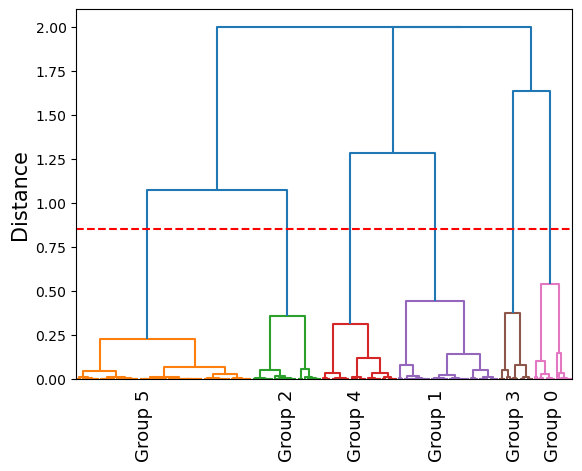

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linkage_data = linkage(final_merged_all_fold_changes_filtered_ions, method='complete', metric='correlation')
dendrogram(linkage_data, color_threshold=0.85)
plt.axhline(y = 0.85, color = 'red', linestyle = '--')
plt.ylabel('Distance', fontsize = 15)
plt.xticks([500, 1550, 2050, 2650, 3220, 3500], ['Group 5', 'Group 2', 'Group 4', 'Group 1', 'Group 3', 'Group 0'],
       rotation=90, fontsize = 13)
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_ion_clustering_dendrogram.tiff', bbox_inches = 'tight')
plt.show()

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


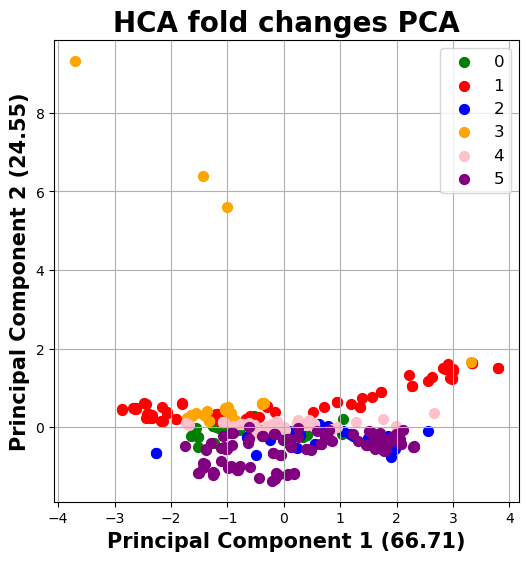

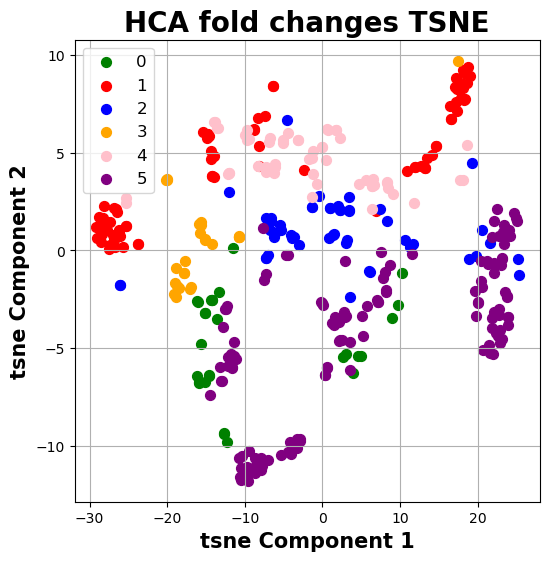

Text(0.5, 1.0, 'HCA fold changes UMAP')

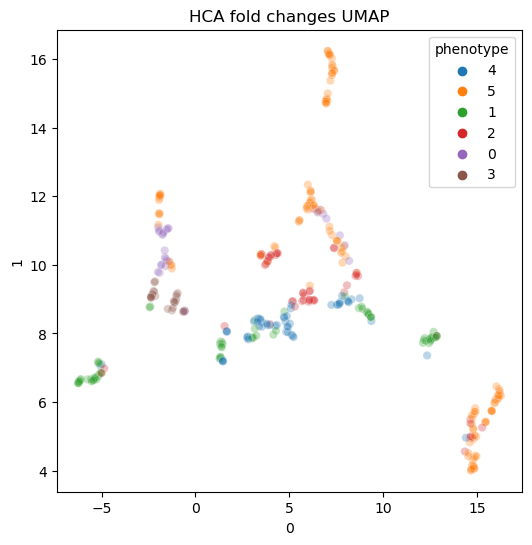

In [16]:
n_clusters_hc = 6
hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters_hc, affinity='correlation', linkage='complete')
labels_hc = hierarchical_cluster.fit_predict(final_merged_all_fold_changes_filtered_ions)

final_merged_all_fold_changes_filtered_ions['labels_hc'] = labels_hc
# Standardize data
final_merged_all_fold_changes_filtered_ions_standardized = StandardScaler().fit_transform(final_merged_all_fold_changes_filtered_ions.drop(columns = ['labels_hc']))

# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(final_merged_all_fold_changes_filtered_ions_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = labels_hc
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'Principal Component 1 ({percent_variance[0]})', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Principal Component 2 ({percent_variance[1]})', fontsize = 15, fontweight = 'bold')
ax.set_title('HCA fold changes PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(n_clusters_hc))
group_numbers = list(range(n_clusters_hc))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 50)
ax.legend(labels, fontsize = 'large')
ax.grid()
plt.show()


tsne = TSNE(n_components=2, random_state = 100)
tsne_components = tsne.fit_transform(final_merged_all_fold_changes_filtered_ions_standardized)
principalDf = pd.DataFrame(data = tsne_components, columns = ['tsne component 1', 'tsne component 2'])
principalDf['phenotype'] = labels_hc
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('tsne Component 2', fontsize = 15, fontweight = 'bold')
ax.set_title('HCA fold changes TSNE', fontsize = 20, fontweight = 'bold')
labels = list(range(n_clusters_hc))
group_numbers = list(range(n_clusters_hc))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple']
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf['phenotype'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'tsne component 1']
               , principalDf.loc[indicesToKeep, 'tsne component 2'] 
               , c = color
               , s = 50, alpha = 1)
ax.legend(labels, fontsize = 'large')
# Scatter 301
#plt.scatter(3.936206, 2.881305, color = 'black')
ax.grid()
plt.show()

plt.figure(figsize = (6, 6))
reducer = umap.UMAP()
embedding = reducer.fit_transform(final_merged_all_fold_changes_filtered_ions_standardized)
embedding_df = pd.DataFrame(embedding)
embedding_df['phenotype'] = labels_hc
embedding_df['phenotype'] = embedding_df['phenotype'].replace({0 : '0', 1 : '1', 2 : '2', 3 : '3', 4: '4', 5: '5'})

sns.scatterplot(data = embedding_df, hue = 'phenotype', x = 0, y = 1, alpha = 0.3)
plt.title('HCA fold changes UMAP', fontsize=12)

## Below we look at the clusters by plotting the trends of the logFC over time for each cluster

In [17]:
cluster0 = final_merged_all_fold_changes_filtered_ions[final_merged_all_fold_changes_filtered_ions['labels_hc'] == 0]
cluster1 = final_merged_all_fold_changes_filtered_ions[final_merged_all_fold_changes_filtered_ions['labels_hc'] == 1]
cluster2 = final_merged_all_fold_changes_filtered_ions[final_merged_all_fold_changes_filtered_ions['labels_hc'] == 2]
cluster3 = final_merged_all_fold_changes_filtered_ions[final_merged_all_fold_changes_filtered_ions['labels_hc'] == 3]
cluster4 = final_merged_all_fold_changes_filtered_ions[final_merged_all_fold_changes_filtered_ions['labels_hc'] == 4]
cluster5 = final_merged_all_fold_changes_filtered_ions[final_merged_all_fold_changes_filtered_ions['labels_hc'] == 5]
final_merged_all_fold_changes_filtered_ions_sorted_by_cluster = final_merged_all_fold_changes_filtered_ions.sort_values(by = 'labels_hc')
final_merged_all_fold_changes_filtered_ions_sorted_by_cluster.to_csv('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_ion_clustering_using_logfc_patterns_over_time.csv')
final_merged_all_fold_changes_filtered_ions_sorted_by_cluster

,log2fc_6mo,log2fc_12mo,log2fc_22mo,labels_hc
884.5394,-0.888687,-1.223300,-0.549704,0
685.5149,0.357554,0.143025,1.073493,0
729.5485,-0.139331,-0.504428,0.801032,0
883.5340,-0.887279,-1.098485,-0.512865,0
883.5327,-0.654714,-0.767816,-0.388014,0
...,...,...,...,...
836.5371,-0.630795,-0.633917,-0.347717,5
674.4805,0.545883,0.808888,1.533715,5
810.5298,-0.368538,-0.070959,0.515131,5
858.5237,-0.929188,-0.775006,-0.169338,5


# Only significant Ions From Holier Holy List

In [18]:
ions_significant_in_tg = ['124.0071', '145.0612', '673.4799', '683.4949', '685.5149', '700.5164', '701.5146',
                '726.5419', '727.5335', '728.5511', '746.5150', 
                '762.5073', '764.5199', '772.5316', '773.5358', '301.2172', '600.5060', '602.5082', '327.2329',
                         '750.5399', '766.5374', '776.5504', '778.5600']

clustered_ions_significant_in_tg = final_merged_all_fold_changes_filtered_ions_sorted_by_cluster[final_merged_all_fold_changes_filtered_ions_sorted_by_cluster.index.isin(ions_significant_in_tg)]
clustered_ions_significant_in_tg

,log2fc_6mo,log2fc_12mo,log2fc_22mo,labels_hc
685.5149,0.357554,0.143025,1.073493,0
778.5600,-0.858188,-1.040458,-1.745559,1
301.2172,2.279475,2.473045,0.867510,1
327.2329,1.803667,1.916691,0.658672,1
602.5082,-1.138748,-1.100855,-1.847072,1
600.5060,-1.151372,-0.914181,-1.627919,1
776.5504,-0.381830,-0.268315,-0.180750,2
750.5399,-0.606501,-0.488725,-0.501623,2
726.5419,-0.403879,0.104765,0.493418,2
762.5073,-0.711854,-0.280866,-0.991424,4


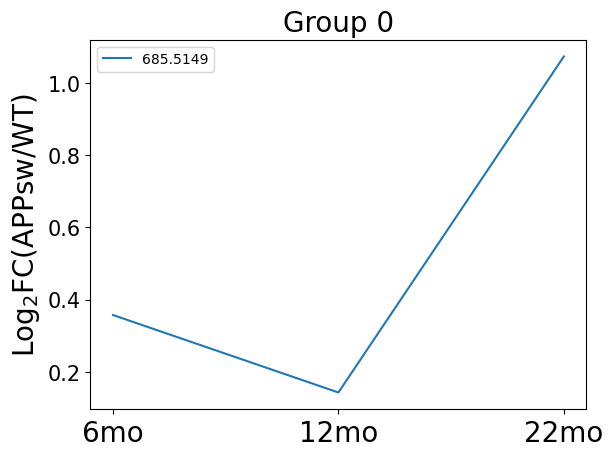

In [15]:
clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 0].drop(columns = 'labels_hc').T.plot(legend = None)
plt.xticks(ticks = [0, 1, 2], labels = ['6mo', '12mo', '22mo'], fontsize = 20)
plt.yticks(fontsize = 15)
plt.ylabel('Log$_2$FC(APPsw/WT)', fontsize = 20)
plt.title('Group 0', fontsize = 20)
plt.legend()
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_holy_list_ion_clustering_group0_plot.tiff', bbox_inches='tight')

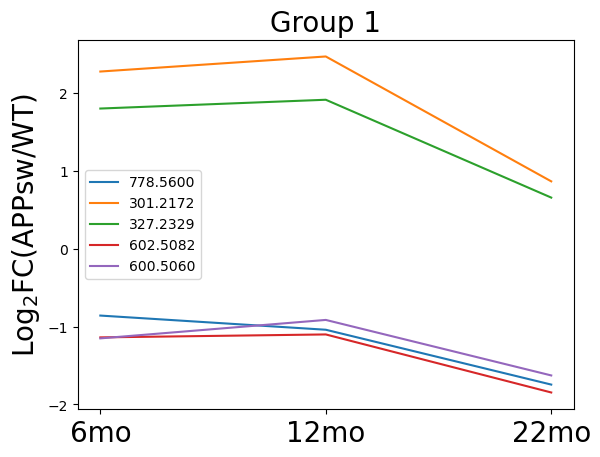

In [16]:
clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 1].drop(columns = 'labels_hc').T.plot(legend = None)
plt.xticks(ticks = [0, 1, 2], labels = ['6mo', '12mo', '22mo'], fontsize = 20)
plt.ylabel('Log$_2$FC(APPsw/WT)', fontsize = 20)
plt.title('Group 1', fontsize = 20)
plt.legend()
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_holy_list_ion_clustering_group1_plot.tiff', bbox_inches='tight')

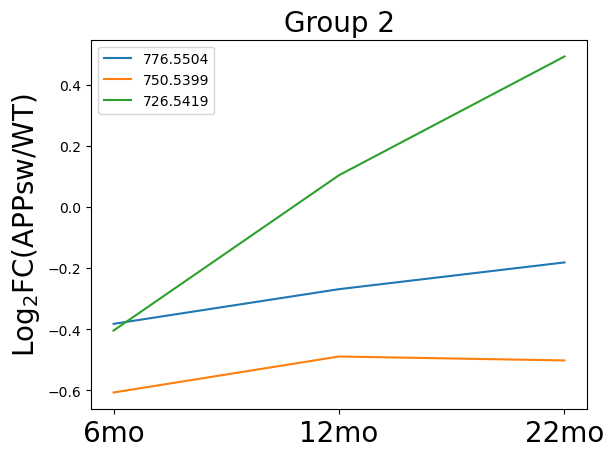

In [17]:
clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 2].drop(columns = 'labels_hc').T.plot(legend = None)
plt.xticks(ticks = [0, 1, 2], labels = ['6mo', '12mo', '22mo'], fontsize = 20)
plt.ylabel('Log$_2$FC(APPsw/WT)', fontsize = 20)
plt.title('Group 2', fontsize = 20)
plt.legend()
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_holy_list_ion_clustering_group2_plot.tiff', bbox_inches='tight')

In [52]:
clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 3].drop(columns = 'labels_hc').T.plot(legend = None)
plt.xticks(ticks = [0, 1, 2], labels = ['6mo', '12mo', '22mo'], fontsize = 20)
plt.ylabel('Log$_2$FC(APPsw/WT)', fontsize = 20)
plt.title('Group 3', fontsize = 20)
#plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_holy_list_ion_clustering_group3_plot.tiff', bbox_inches='tight')

TypeError: no numeric data to plot

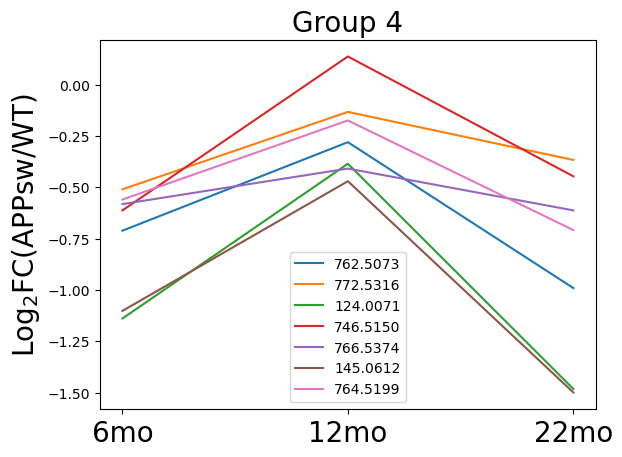

In [18]:
clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 4].drop(columns = 'labels_hc').T.plot(legend = None)
plt.xticks(ticks = [0, 1, 2], labels = ['6mo', '12mo', '22mo'], fontsize = 20)
plt.ylabel('Log$_2$FC(APPsw/WT)', fontsize = 20)
plt.title('Group 4', fontsize = 20)
plt.legend()
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_holy_list_ion_clustering_group4_plot.tiff', bbox_inches='tight')

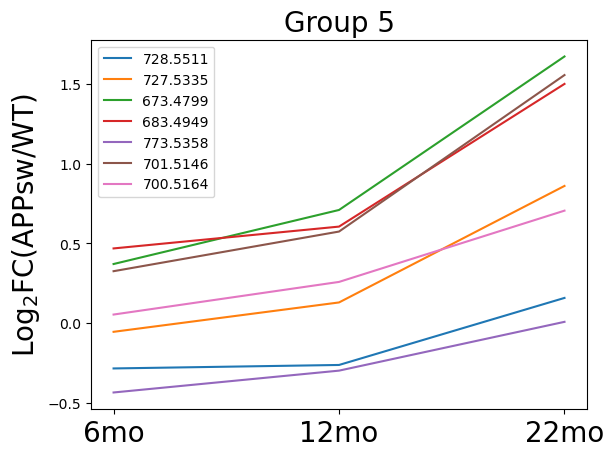

In [19]:
clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 5].drop(columns = 'labels_hc').T.plot(legend = None)
plt.xticks(ticks = [0, 1, 2], labels = ['6mo', '12mo', '22mo'], fontsize = 20)
plt.ylabel('Log$_2$FC(APPsw/WT)', fontsize = 20)
plt.title('Group 5', fontsize = 20)
plt.legend()
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_holy_list_ion_clustering_group5_plot.tiff', bbox_inches='tight')

Below we make a heatmap of the results.

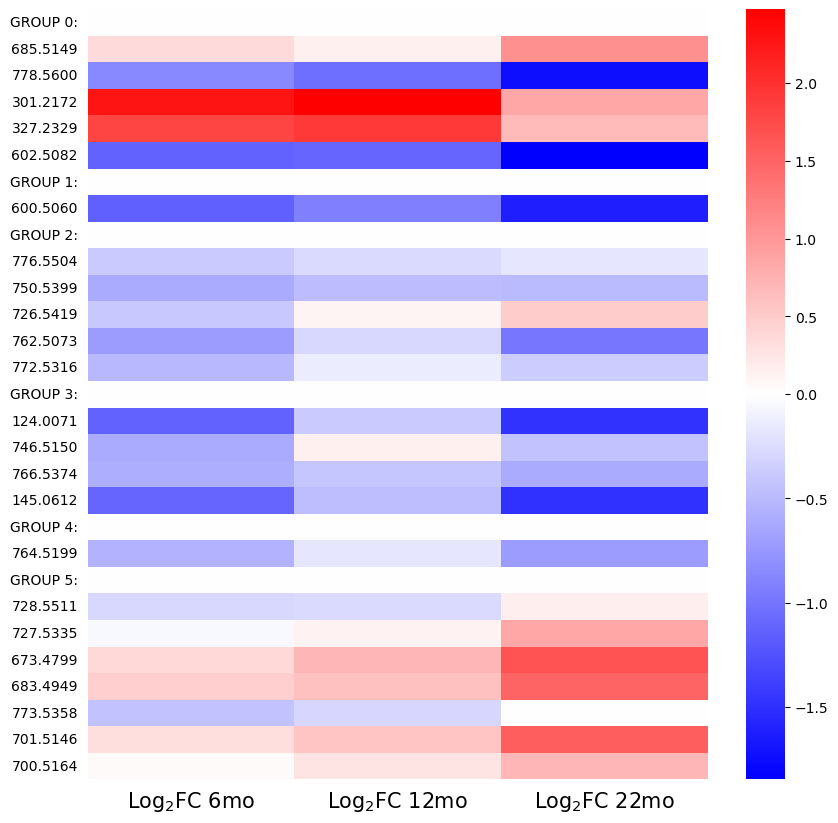

In [23]:
plt.figure(figsize = (10, 10))

# Add white space between groups
line0 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[-1])
df1 = pd.concat([clustered_ions_significant_in_tg.iloc[:0], line0, clustered_ions_significant_in_tg.iloc[0:]])
line = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[7])
df2 = pd.concat([df1.iloc[:6], line, df1.iloc[6:]])
line2 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[9])
df3 = pd.concat([df2.iloc[:8], line2, df2.iloc[8:]])
line3 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[15])
df4 = pd.concat([df3.iloc[:14], line3, df3.iloc[14:]])
line4 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[20])
df5 = pd.concat([df4.iloc[:19], line4, df4.iloc[19:]])
line5 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[22])
df6 = pd.concat([df5.iloc[:21], line5, df5.iloc[21:]])
# Rename index
df6 = df6.rename(index={-1: 'GROUP 0:', 7: 'GROUP 1:', 9: 'GROUP 2:', 15: 'GROUP 3:', 20: 'GROUP 4:', 22: 'GROUP 5:'})

normalize = mcolors.TwoSlopeNorm(vmin= df6[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = df6[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

seaborn.heatmap(df6.drop(columns = 'labels_hc'), cmap = 'bwr', norm = normalize)

'''b, t = plt.xlim()
plt.hlines(y = 6.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 8.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 14.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 19.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 21.5, xmin = b, xmax = t, colors = 'black', lw = 5)'''

plt.xticks([0.5, 1.5, 2.5], labels = ['Log$_2$FC 6mo', 'Log$_2$FC 12mo', 'Log$_2$FC 22mo'], fontsize = 15)
plt.tick_params(left=False, bottom=False)

#plt.yticks([6, 8, 14, 19, 21], labels = ['Group 1:', 'Group 2:', 'Group 3:', 'Group 4:', 'Group 5:'])


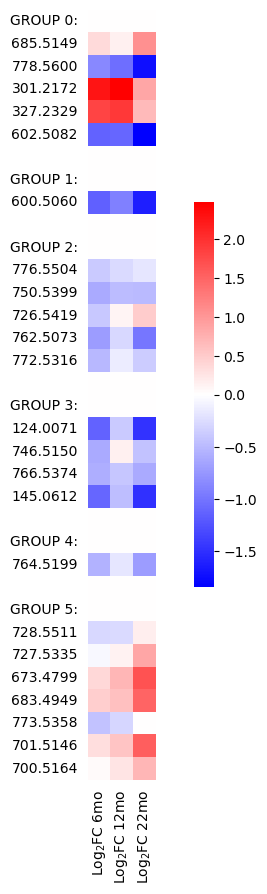

In [24]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

# Add white space between groups
line0 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[-1])
df1 = pd.concat([clustered_ions_significant_in_tg.iloc[:0], line0, clustered_ions_significant_in_tg.iloc[0:]])


line1 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[7])
df2 = pd.concat([df1.iloc[:6], line1, df1.iloc[6:]])
line2 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[8])
df3 = pd.concat([df2.iloc[:7], line2, df2.iloc[7:]])


line3 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[10])
df4 = pd.concat([df3.iloc[:9], line3, df3.iloc[9:]])
line4 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[11])
df5 = pd.concat([df4.iloc[:10], line4, df4.iloc[10:]])


line5 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[17])
df6 = pd.concat([df5.iloc[:16], line5, df5.iloc[16:]])
line6 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[18])
df7 = pd.concat([df6.iloc[:17], line6, df6.iloc[17:]])

line7 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[23])
df8 = pd.concat([df7.iloc[:22], line7, df7.iloc[22:]])
line8 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[24])
df9 = pd.concat([df8.iloc[:23], line8, df8.iloc[23:]])

line9 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[26])
df10 = pd.concat([df9.iloc[:25], line9, df9.iloc[25:]])
line10 = pd.DataFrame({"log2fc_6mo": 0, "log2fc_12mo": 0, "log2fc_22mo": 0, "labels_hc": 0}, index=[27])
df11 = pd.concat([df10.iloc[:26], line10, df10.iloc[26:]])
# Rename index
df11 = df11.rename(index={-1: 'GROUP 0:', 7: '', 8: 'GROUP 1:', 10: '', 11: 'GROUP 2:', 17: '', 18: 'GROUP 3:', 23: '', 24: 'GROUP 4:', 26: '', 27: 'GROUP 5:'})

normalize = mcolors.TwoSlopeNorm(vmin= df11[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = df11[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

seaborn.heatmap(df11.drop(columns = 'labels_hc'), cmap = 'bwr', norm = normalize, ax = ax, cbar_kws={"shrink": 0.5})

'''b, t = plt.xlim()
plt.hlines(y = 6.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 8.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 14.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 19.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 21.5, xmin = b, xmax = t, colors = 'black', lw = 5)'''

plt.xticks([0.5, 1.5, 2.5], labels = ['Log$_2$FC 6mo', 'Log$_2$FC 12mo', 'Log$_2$FC 22mo'], fontsize = 10, rotation = 90)
plt.tick_params(left=False, bottom=False)
ax.axes.set_aspect('equal')
#plt.yticks([6, 8, 14, 19, 21], labels = ['Group 1:', 'Group 2:', 'Group 3:', 'Group 4:', 'Group 5:'])
#plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_holy_list_heatmap.tiff', bbox_inches='tight')

# Below we make heatmaps for each group with their own scale bars to accentuate the change in each group

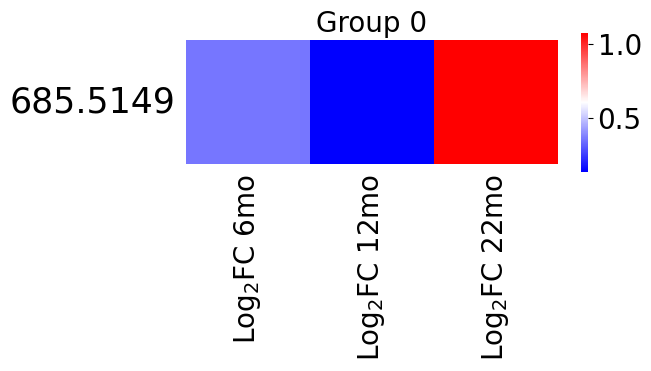

In [16]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)

# Make group 0 dataframe
clustered_ions_significant_in_tg_group0 = clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 0]

#normalize = mcolors.TwoSlopeNorm(vmin= clustered_ions_significant_in_tg_group0[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = clustered_ions_significant_in_tg_group0[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

seaborn.heatmap(clustered_ions_significant_in_tg_group0.drop(columns = 'labels_hc'), cmap = 'bwr', ax = ax, cbar_kws={"shrink": 0.3})

'''b, t = plt.xlim()
plt.hlines(y = 6.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 8.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 14.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 19.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 21.5, xmin = b, xmax = t, colors = 'black', lw = 5)'''

plt.xticks([0.5, 1.5, 2.5], labels = ['Log$_2$FC 6mo', 'Log$_2$FC 12mo', 'Log$_2$FC 22mo'], fontsize = 20, rotation = 90)
plt.tick_params(left=False, bottom=False)
plt.yticks(rotation = 0, fontsize = 25)
ax.axes.set_aspect('equal')
plt.title('Group 0', fontsize = 20)
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=20)
#plt.yticks([6, 8, 14, 19, 21], labels = ['Group 1:', 'Group 2:', 'Group 3:', 'Group 4:', 'Group 5:'])
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_holy_list_heatmap_group0_only.tiff', bbox_inches='tight')

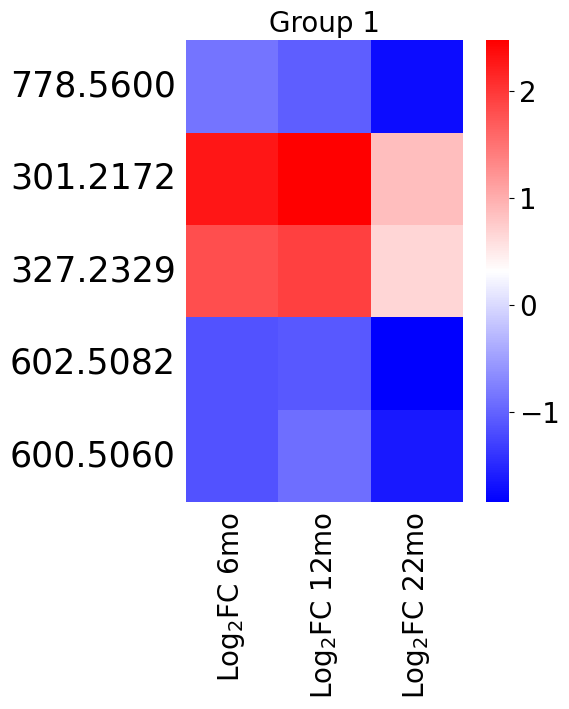

In [17]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)

# Make group 1 dataframe
clustered_ions_significant_in_tg_group1 = clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 1]

#normalize = mcolors.TwoSlopeNorm(vmin= clustered_ions_significant_in_tg_group1[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = clustered_ions_significant_in_tg_group1[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

seaborn.heatmap(clustered_ions_significant_in_tg_group1.drop(columns = 'labels_hc'), cmap = 'bwr', ax = ax, cbar_kws={"shrink": 1.0})

'''b, t = plt.xlim()
plt.hlines(y = 6.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 8.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 14.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 19.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 21.5, xmin = b, xmax = t, colors = 'black', lw = 5)'''

plt.xticks([0.5, 1.5, 2.5], labels = ['Log$_2$FC 6mo', 'Log$_2$FC 12mo', 'Log$_2$FC 22mo'], fontsize = 20, rotation = 90)
plt.tick_params(left=False, bottom=False)
plt.yticks(rotation = 0, fontsize = 25)
ax.axes.set_aspect('equal')
plt.title('Group 1', fontsize = 20)
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=20)
#plt.yticks([6, 8, 14, 19, 21], labels = ['Group 1:', 'Group 2:', 'Group 3:', 'Group 4:', 'Group 5:'])
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_holy_list_heatmap_group1_only.tiff', bbox_inches='tight')

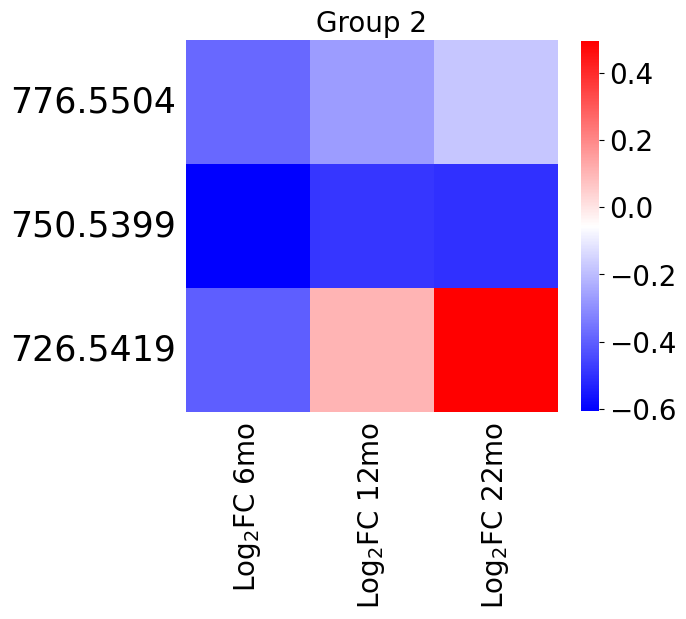

In [18]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)

# Make group 2 dataframe
clustered_ions_significant_in_tg_group2 = clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 2]

#normalize = mcolors.TwoSlopeNorm(vmin= clustered_ions_significant_in_tg_group2[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = clustered_ions_significant_in_tg_group2[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

seaborn.heatmap(clustered_ions_significant_in_tg_group2.drop(columns = 'labels_hc'), cmap = 'bwr', ax = ax, cbar_kws={"shrink": 0.8})

'''b, t = plt.xlim()
plt.hlines(y = 6.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 8.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 14.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 19.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 21.5, xmin = b, xmax = t, colors = 'black', lw = 5)'''

plt.xticks([0.5, 1.5, 2.5], labels = ['Log$_2$FC 6mo', 'Log$_2$FC 12mo', 'Log$_2$FC 22mo'], fontsize = 20, rotation = 90)
plt.tick_params(left=False, bottom=False)
plt.yticks(rotation = 0, fontsize = 25)
ax.axes.set_aspect('equal')
plt.title('Group 2', fontsize = 20)
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=20)
#plt.yticks([6, 8, 14, 19, 21], labels = ['Group 1:', 'Group 2:', 'Group 3:', 'Group 4:', 'Group 5:'])
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_holy_list_heatmap_group2_only.tiff', bbox_inches='tight')

ValueError: zero-size array to reduction operation fmin which has no identity

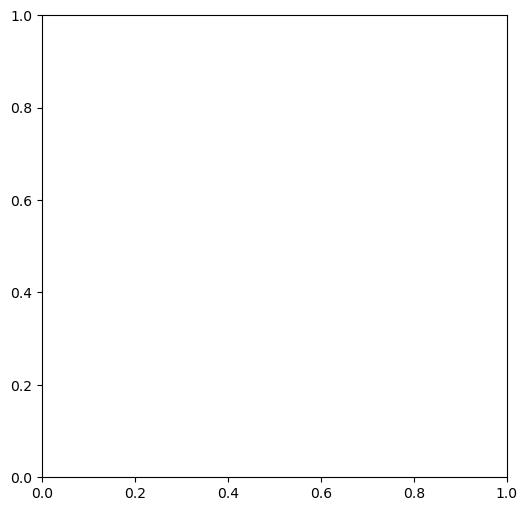

In [28]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)

# Make group 3 dataframe
clustered_ions_significant_in_tg_group3 = clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 3]

#normalize = mcolors.TwoSlopeNorm(vmin= clustered_ions_significant_in_tg_group3[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = clustered_ions_significant_in_tg_group3[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

seaborn.heatmap(clustered_ions_significant_in_tg_group3.drop(columns = 'labels_hc'), cmap = 'bwr', ax = ax, cbar_kws={"shrink": 0.5})

'''b, t = plt.xlim()
plt.hlines(y = 6.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 8.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 14.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 19.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 21.5, xmin = b, xmax = t, colors = 'black', lw = 5)'''

plt.xticks([0.5, 1.5, 2.5], labels = ['Log$_2$FC 6mo', 'Log$_2$FC 12mo', 'Log$_2$FC 22mo'], fontsize = 10, rotation = 90)
plt.tick_params(left=False, bottom=False)
plt.yticks(rotation = 0, fontsize = 25)
ax.axes.set_aspect('equal')
plt.title('Group 3', fontsize = 20)
#plt.yticks([6, 8, 14, 19, 21], labels = ['Group 1:', 'Group 2:', 'Group 3:', 'Group 4:', 'Group 5:'])
#plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_holy_list_heatmap_group3_only.tiff', bbox_inches='tight')

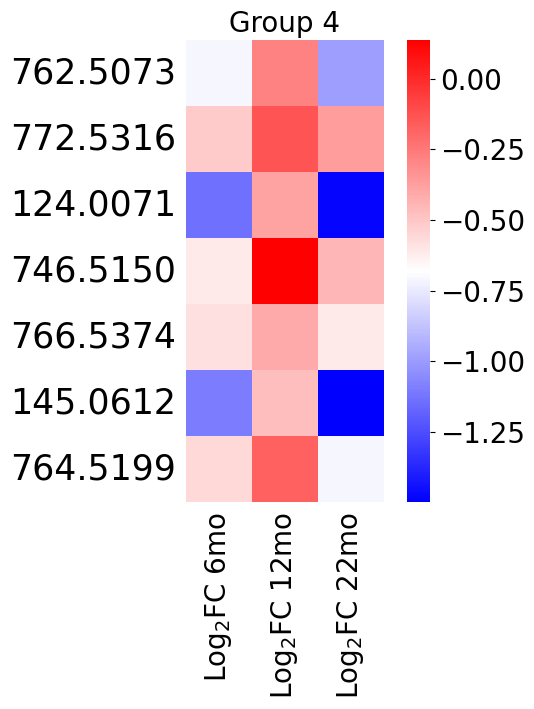

In [19]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)

# Make group 4 dataframe
clustered_ions_significant_in_tg_group4 = clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 4]

#normalize = mcolors.TwoSlopeNorm(vmin= clustered_ions_significant_in_tg_group4[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = clustered_ions_significant_in_tg_group4[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

seaborn.heatmap(clustered_ions_significant_in_tg_group4.drop(columns = 'labels_hc'), cmap = 'bwr', ax = ax, cbar_kws={"shrink": 1.0})

'''b, t = plt.xlim()
plt.hlines(y = 6.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 8.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 14.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 19.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 21.5, xmin = b, xmax = t, colors = 'black', lw = 5)'''

plt.xticks([0.5, 1.5, 2.5], labels = ['Log$_2$FC 6mo', 'Log$_2$FC 12mo', 'Log$_2$FC 22mo'], fontsize = 20, rotation = 90)
plt.tick_params(left=False, bottom=False)
plt.yticks(rotation = 0, fontsize = 25)
ax.axes.set_aspect('equal')
plt.title('Group 4', fontsize = 20)
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=20)
#plt.yticks([6, 8, 14, 19, 21], labels = ['Group 1:', 'Group 2:', 'Group 3:', 'Group 4:', 'Group 5:'])
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_holy_list_heatmap_group4_only.tiff', bbox_inches='tight')

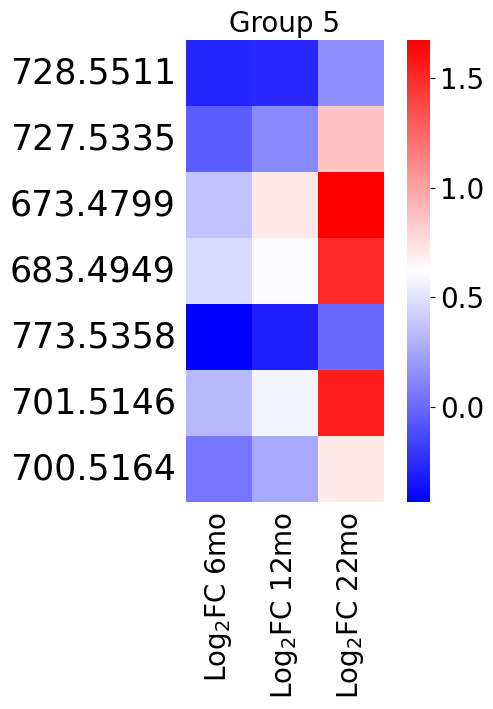

In [20]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)

# Make group 2 dataframe
clustered_ions_significant_in_tg_group5 = clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 5]

#normalize = mcolors.TwoSlopeNorm(vmin= clustered_ions_significant_in_tg_group5[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = clustered_ions_significant_in_tg_group5[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

seaborn.heatmap(clustered_ions_significant_in_tg_group5.drop(columns = 'labels_hc'), cmap = 'bwr', ax = ax, cbar_kws={"shrink": 1.0})

'''b, t = plt.xlim()
plt.hlines(y = 6.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 8.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 14.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 19.5, xmin = b, xmax = t, colors = 'black', lw = 5)
plt.hlines(y = 21.5, xmin = b, xmax = t, colors = 'black', lw = 5)'''

plt.xticks([0.5, 1.5, 2.5], labels = ['Log$_2$FC 6mo', 'Log$_2$FC 12mo', 'Log$_2$FC 22mo'], fontsize = 20, rotation = 90)
plt.tick_params(left=False, bottom=False)
plt.yticks(rotation = 0, fontsize = 25)
ax.axes.set_aspect('equal')
plt.title('Group 5', fontsize = 20)
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=20)
#plt.yticks([6, 8, 14, 19, 21], labels = ['Group 1:', 'Group 2:', 'Group 3:', 'Group 4:', 'Group 5:'])
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_holy_list_heatmap_group5_only.tiff', bbox_inches='tight')

# Below we look at the log2fc change compared to 6mo WT mice for all groups.

In [21]:
np.mean(clustered_ions_significant_in_tg_group0['log2fc_12mo']-clustered_ions_significant_in_tg_group0['log2fc_6mo'])

-0.21452880545543482

In [22]:
np.mean(clustered_ions_significant_in_tg_group0['log2fc_22mo']-clustered_ions_significant_in_tg_group0['log2fc_12mo'])

0.9304676053762572

In [23]:
np.mean(clustered_ions_significant_in_tg_group1['log2fc_12mo']-clustered_ions_significant_in_tg_group1['log2fc_6mo'])

0.07988122725548859

In [24]:
np.mean(clustered_ions_significant_in_tg_group1['log2fc_22mo']-clustered_ions_significant_in_tg_group1['log2fc_12mo'])

-1.0057217543031103

In [25]:
np.mean(clustered_ions_significant_in_tg_group2['log2fc_12mo']-clustered_ions_significant_in_tg_group2['log2fc_6mo'])

0.24664506617414197

In [26]:
np.mean(clustered_ions_significant_in_tg_group2['log2fc_22mo']-clustered_ions_significant_in_tg_group2['log2fc_12mo'])

0.1544399669843516

In [27]:
np.mean(clustered_ions_significant_in_tg_group4['log2fc_12mo']-clustered_ions_significant_in_tg_group4['log2fc_6mo'])

0.5001237136899562

In [28]:
np.mean(clustered_ions_significant_in_tg_group4['log2fc_22mo']-clustered_ions_significant_in_tg_group4['log2fc_12mo'])

-0.6273137026857081

In [29]:
np.mean(clustered_ions_significant_in_tg_group5['log2fc_12mo']-clustered_ions_significant_in_tg_group5['log2fc_6mo'])

0.18187692847496661

In [30]:
np.mean(clustered_ions_significant_in_tg_group5['log2fc_22mo']-clustered_ions_significant_in_tg_group5['log2fc_12mo'])

0.6781261861001997

## Below we save the images without labels

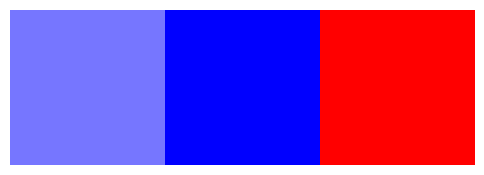

In [35]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)

# Make group 0 dataframe
clustered_ions_significant_in_tg_group0 = clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 0]

#normalize = mcolors.TwoSlopeNorm(vmin= clustered_ions_significant_in_tg_group0[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = clustered_ions_significant_in_tg_group0[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

seaborn.heatmap(clustered_ions_significant_in_tg_group0.drop(columns = 'labels_hc'), cmap = 'bwr', ax = ax, cbar = False)
ax.axes.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_holy_list_heatmap_group0_only_no_labels.tiff', bbox_inches='tight')

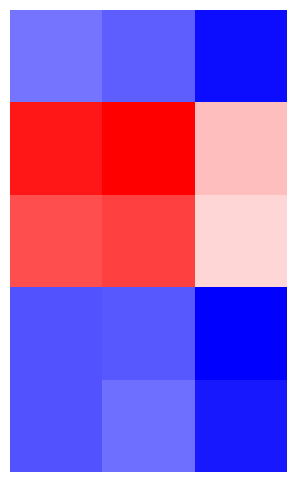

In [36]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)

# Make group 1 dataframe
clustered_ions_significant_in_tg_group1 = clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 1]

#normalize = mcolors.TwoSlopeNorm(vmin= clustered_ions_significant_in_tg_group1[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = clustered_ions_significant_in_tg_group1[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

seaborn.heatmap(clustered_ions_significant_in_tg_group1.drop(columns = 'labels_hc'), cmap = 'bwr', ax = ax, cbar = False)
ax.axes.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_holy_list_heatmap_group1_only_no_labels.tiff', bbox_inches='tight')

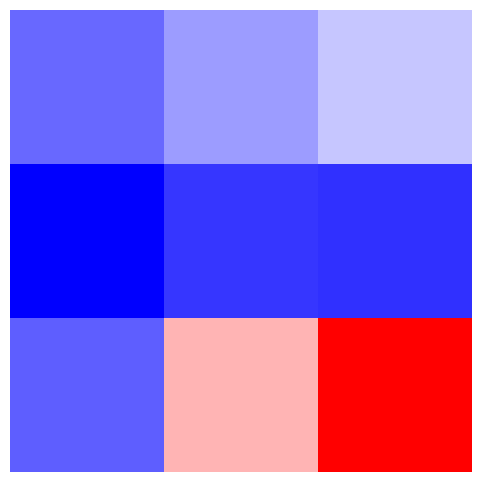

In [37]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)

# Make group 2 dataframe
clustered_ions_significant_in_tg_group2 = clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 2]

#normalize = mcolors.TwoSlopeNorm(vmin= clustered_ions_significant_in_tg_group2[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = clustered_ions_significant_in_tg_group2[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

seaborn.heatmap(clustered_ions_significant_in_tg_group2.drop(columns = 'labels_hc'), cmap = 'bwr', ax = ax, cbar = False)
ax.axes.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_holy_list_heatmap_group2_only_no_labels.tiff', bbox_inches='tight')

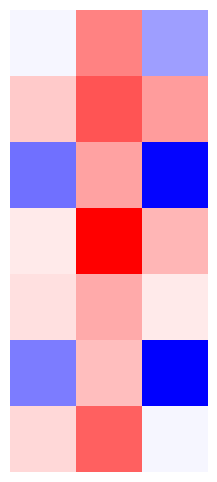

In [38]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)

# Make group 4 dataframe
clustered_ions_significant_in_tg_group4 = clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 4]

#normalize = mcolors.TwoSlopeNorm(vmin= clustered_ions_significant_in_tg_group4[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = clustered_ions_significant_in_tg_group4[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

seaborn.heatmap(clustered_ions_significant_in_tg_group4.drop(columns = 'labels_hc'), cmap = 'bwr', ax = ax, cbar = False)
ax.axes.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_holy_list_heatmap_group4_only_no_labels.tiff', bbox_inches='tight')

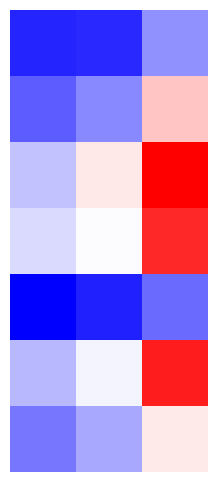

In [39]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)

# Make group 2 dataframe
clustered_ions_significant_in_tg_group5 = clustered_ions_significant_in_tg[clustered_ions_significant_in_tg['labels_hc'] == 5]

#normalize = mcolors.TwoSlopeNorm(vmin= clustered_ions_significant_in_tg_group5[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].min().min(), vmax = clustered_ions_significant_in_tg_group5[['log2fc_6mo', 'log2fc_12mo', 'log2fc_22mo']].max().max(), vcenter=0)

seaborn.heatmap(clustered_ions_significant_in_tg_group5.drop(columns = 'labels_hc'), cmap = 'bwr', ax = ax, cbar = False)
ax.axes.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('C:/Users/Waters/NEW AGE Negative and Positive Clustering For Paper/Images For Paper/Negative GP Ion Changes  Over Time Compared to 6mo WT/negative_globus_pallidus_holy_list_heatmap_group5_only_no_labels.tiff', bbox_inches='tight')